In [9]:
import cv2
import numpy as np
im = cv2.imread("data/natalie_portman.jpg")

In [10]:
type(im)

numpy.ndarray

In [13]:
im.shape

(599, 900, 3)

# Mostrare immagini con l'oggetto pyplot

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(im)

Come si nota l'immagine è invertita, perché è letta in BGR anziche RBG. Converto

# Gestione dei colori

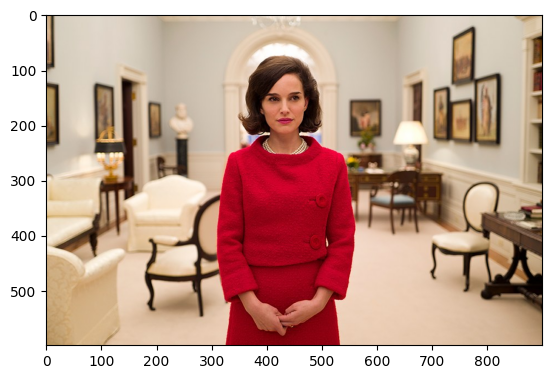

In [15]:
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

Una alternativa è invertire i layer

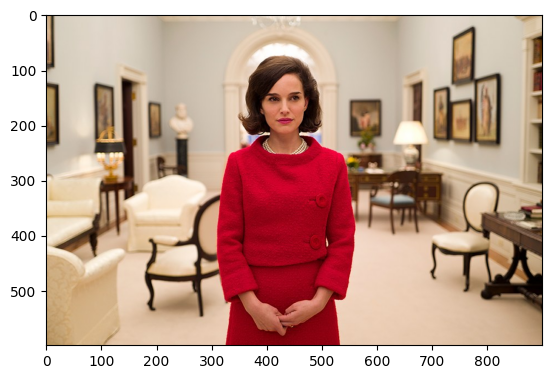

In [16]:
%matplotlib inline
im_rgb_numpy = im[:,:,[2,1,0]]
plt.imshow(im_rgb_numpy)

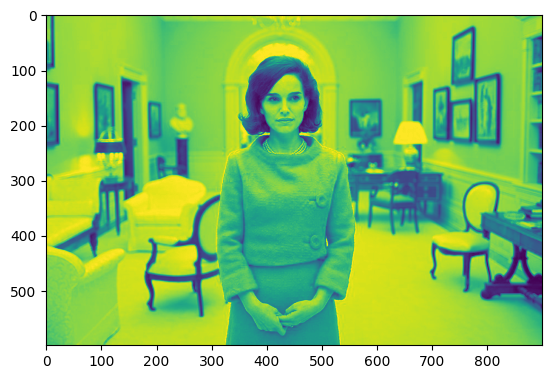

In [19]:
plt.imshow(im[:,:,2])

valori del rosso dell'ndarrays

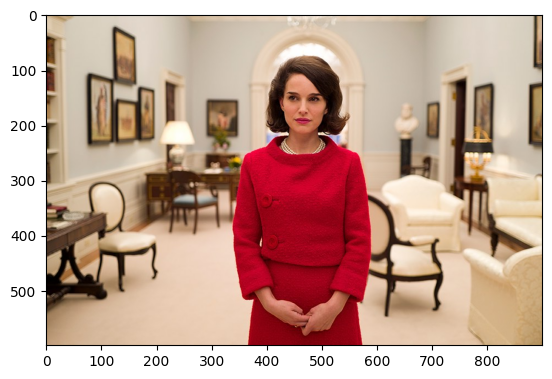

In [102]:
im_rgb_numpy_flip_oriz = np.fliplr(im_rgb_numpy)
plt.imshow(im_rgb_numpy_flip_oriz)

256


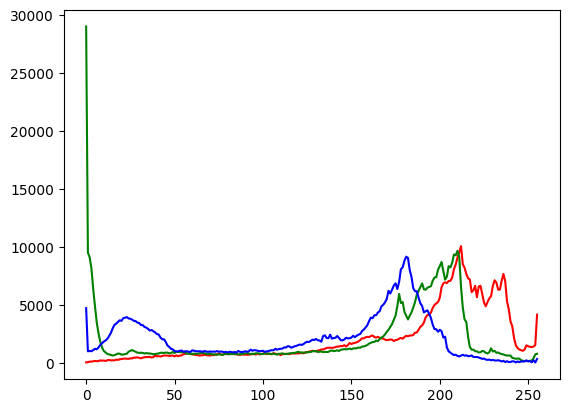

In [24]:
#fig, ax = plt.subplots(1, figsize=(10,10))
fig, ax = plt.subplots()
im_red = im_rgb[:,:,0]
im_green = im_rgb[:,:,1]
im_blue = im_rgb[:,:,2]
hist_red = np.histogram(im_red.flatten(), 256,[0,256]) #flatten comprime in una dimensione l'array
hist_green =np.histogram(im_green.flatten(), 256,[0,256])
hist_blue = np.histogram(im_blue.flatten(), 256,[0,256])

ax.plot(hist_red[1][:-1], hist_red[0], "-", c="red")
ax.plot(hist_green[1][:-1], hist_green[0], "-", c="green")
ax.plot(hist_blue[1][:-1], hist_blue[0], "-", c="blue")

plt.show()

## Blurring con numpy

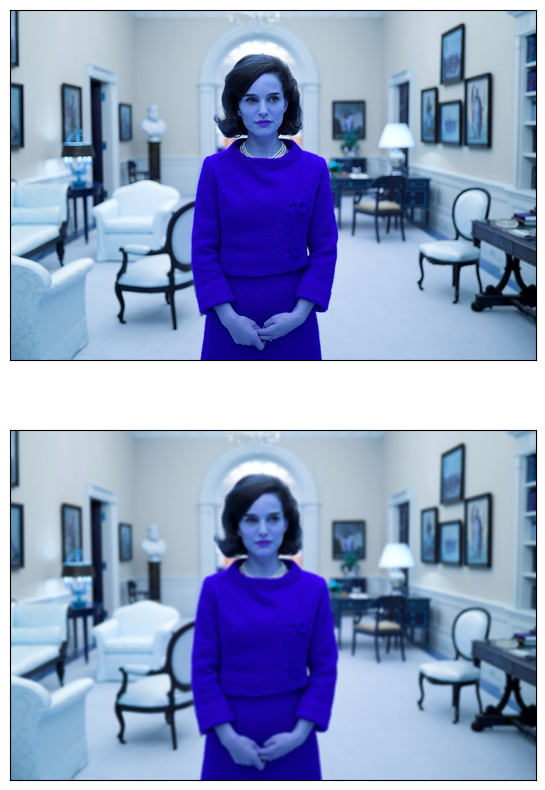

In [50]:
kernel = np.ones((5,5),np.float32)/25
im_average = cv2.filter2D(im,-1,kernel)
fig,ax = plt.subplots(2,figsize=(10,10))
ax[0].imshow(im)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[1].imshow(im_average)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)


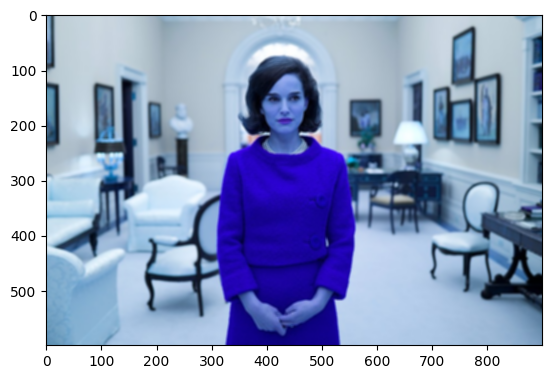

In [51]:
blur = cv2.blur(im,(5,5))
difference = blur-im_average
plt.imshow(blur)

# Image rotation and flipping

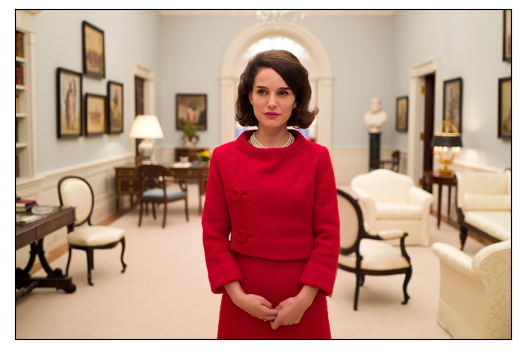

In [154]:
fig, ax = plt.subplots()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.imshow(np.flip(im_rgb, axis=1))

### RICONOSCIMENTO FACCE

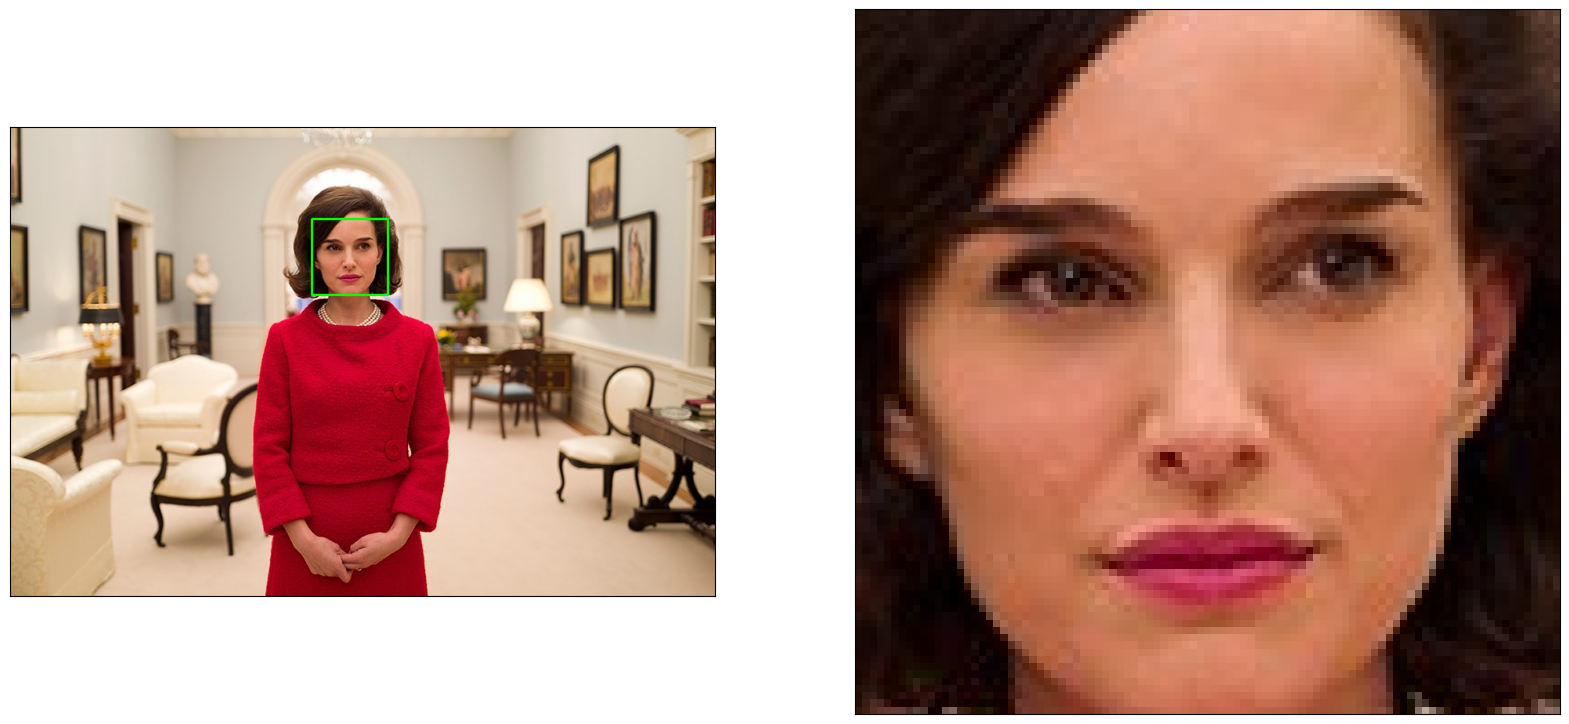

In [60]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray= cv2.cvtColor(im_rgb,cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 5) # cosa accade se modifichiamo l'intero?
#print(faces)
im_rgb_tosketch = im_rgb.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(im_rgb_tosketch, (x, y), (x+w, y+h), (0, 255, 0), 2)
# Display
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(im_rgb_tosketch)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

x, y, w, h = faces[0]
im_rgb_cut = im_rgb[y:y+w,x:x+w,:]
ax[1].imshow(im_rgb_cut)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

# Rotation 

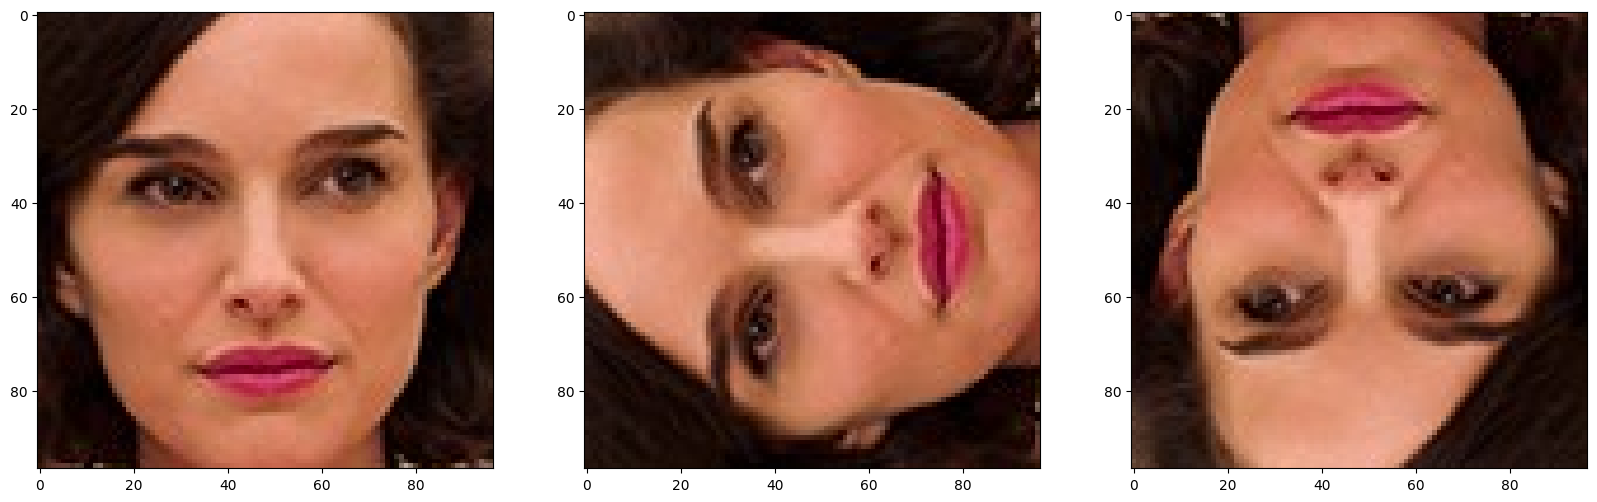

In [182]:
im_gallery_rot = []
for i in np.arange(3):
    im_gallery_rot.append( np.rot90(im_rgb_cut,i))
 
fig, ax = plt.subplots(1,len(im_gallery_rot), figsize=(20,10))
for idx, c_image in enumerate(im_gallery_rot):
    ax[idx].imshow(c_image)

# Random crop

In [183]:
x_shift = np.random.uniform(-40,40,10)
y_shift = np.random.uniform(-40,40,10)
x_shift = x_shift.astype(int)
y_shift = y_shift.astype(int)
coord_shift = zip(x_shift, y_shift)

In [184]:
random_crop_list = []
for x_shift, y_shift in coord_shift:
    im_rgb_random_crop = im_rgb[y+y_shift:y+y_shift+w,x+x_shift:x+x_shift+w,:]
    random_crop_list.append(im_rgb_random_crop)
    
print(len(random_crop_list))

10


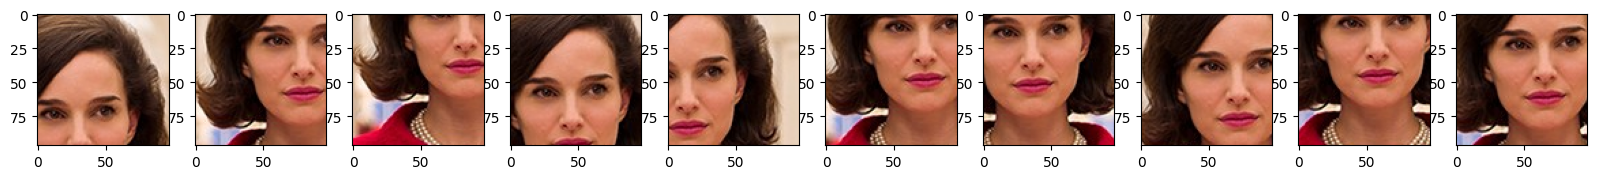

In [185]:
fig, ax = plt.subplots(1,len(random_crop_list), figsize=(20,10))
for idx, c_image in enumerate(random_crop_list):
    ax[idx].imshow(c_image)

In [186]:
from scipy.ndimage import rotate

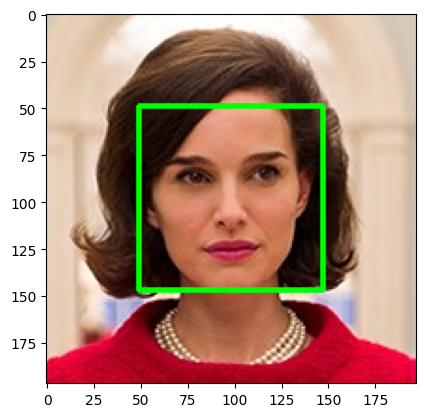

In [188]:
frame = 50
x_new = x - frame
w_new = w + 2*frame
h_new = h + 2*frame
y_new = y - frame
im_rgb_frame = im_rgb[y_new:y_new+h_new, x_new:x_new+w_new, :]

#new coordinates_
gray_small= cv2.cvtColor(im_rgb_frame,cv2.COLOR_RGB2GRAY)
faces_small = face_cascade.detectMultiScale(gray_small, 1.1, 5)
x_small, y_small, w_small, h_small = faces_small[0]
copy_rect = im_rgb_frame.copy()

for (x_small, y_small, w_small, h_small) in faces_small:
    cv2.rectangle(copy_rect, (x_small, y_small), (x_small+w_small, y_small+h_small), (0, 255, 0), 2)
plt.imshow(copy_rect)

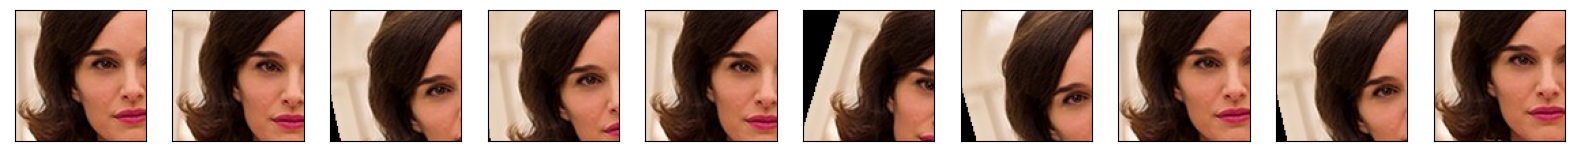

In [180]:
list_of_rot_im = []
degrees = np.random.uniform(-20,20,10)
fig, ax = plt.subplots(1, len(degrees), figsize=(20,10))
for idx, deg in enumerate(degrees):
    im_rotated = rotate(im_rgb_frame,deg)
    im_rotated_crop = im_rotated[y_small:y_small+h_small,x_small:x_small+w_small,:]
    ax[idx].imshow(im_rotated_crop)
    ax[idx].get_xaxis().set_visible(False)
    ax[idx].get_yaxis().set_visible(False)
